In [2]:
import sqlite3

In [3]:
connection = sqlite3.connect("mydb.db")

In [4]:
connection

In [5]:
table_creation_query = """
CREATE TABLE IF NOT EXISTS employees (
emp_id INTEGER PRIMARY KEY,
first_name TEXT NOT NULL,
last_name TEXT NOT NULL,
email TEXT UNIQUE NOT NULL,
hire_date TEXT NOT NULL,
salary REAL NOT NULL
);
"""

In [6]:
table_creation_query2 = """
CREATE TABLE IF NOT EXISTS customers (
customer_id INTEGER PRIMARY KEY,
first_name TEXT NOT NULL,
last_name TEXT NOT NULL,
email TEXT UNIQUE NOT NULL,
phone_number TEXT
);
"""

In [7]:
table_creation_query3 = """
CREATE TABLE IF NOT EXISTS orders (
order_id INTEGER PRIMARY KEY AUTOINCREMENT,
customer_id INTEGER NOT NULL,
order_date TEXT NOT NULL,
amount REAL NOT NULL,
FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);
"""

In [8]:
cursor = connection.cursor()

In [9]:
cursor.execute(table_creation_query)
cursor.execute(table_creation_query2)
cursor.execute(table_creation_query3)

In [10]:
#  2. Delete all data from all tables
cursor.execute("DELETE FROM orders;")
cursor.execute("DELETE FROM customers;")
cursor.execute("DELETE FROM employees;")

# 3. Commit the changes
connection.commit()


In [11]:
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone_number)
VALUES (?, ?, ?, ?, ?);
"""

insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

In [12]:
employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

In [13]:
customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]


In [14]:
orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

In [15]:
cursor.executemany(insert_query, employee_data)
cursor.executemany(insert_query_customers, customers_data)
cursor.executemany(insert_query_orders, orders_data)

In [16]:
connection.commit()

In [17]:
cursor.execute("SELECT * FROM employees;")

In [18]:
for row in cursor.fetchall():
    print(row)

(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0)
(2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0)
(3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0)
(4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)


In [19]:
 from langchain_community.utilities import SQLDatabase

In [20]:
db = SQLDatabase.from_uri("sqlite:///mydb.db")

In [21]:
db

In [22]:
db.dialect

'sqlite'

In [23]:
db.get_usable_table_names()

['customers', 'employees', 'orders']

In [ ]:
from langchain_groq import ChatGroq

from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Use the environment variable
llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    groq_api_key=os.getenv("GROQ_API_KEY")
)

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
llm.invoke("Hello, how are you?")

AIMessage(content="Hello. I'm just a language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you might have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 41, 'total_tokens': 89, 'completion_time': 0.109267274, 'completion_tokens_details': None, 'prompt_time': 0.006099233, 'prompt_tokens_details': None, 'queue_time': 0.039130442, 'total_time': 0.115366507}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_43d97c5965', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bde08-ed14-74f3-a332-c92bf9e9ebbe-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 48, 'total_tokens': 89})

In [26]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

In [27]:
toolkit = SQLDatabaseToolkit(db=db, llm=llm)

In [28]:
tools = toolkit.get_tools()

In [29]:
for tool in tools:
    print(tool.name)

sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [30]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None)


In [31]:
list_tables_tool

ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x10ea51e10>)

In [32]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None)


In [33]:
get_schema_tool

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x10ea51e10>)

In [34]:
print(list_tables_tool.invoke(""))


customers, employees, orders


In [35]:
print(get_schema_tool.invoke("employees"))



CREATE TABLE employees (
	emp_id INTEGER, 
	first_name TEXT NOT NULL, 
	last_name TEXT NOT NULL, 
	email TEXT NOT NULL, 
	hire_date TEXT NOT NULL, 
	salary REAL NOT NULL, 
	PRIMARY KEY (emp_id), 
	UNIQUE (email)
)

/*
3 rows from employees table:
emp_id	first_name	last_name	email	hire_date	salary
1	Sunny	Savita	sunny.sv@abc.com	2023-06-01	50000.0
2	Arhun	Meheta	arhun.m@gmail.com	2022-04-15	60000.0
3	Alice	Johnson	alice.johnson@jpg.com	2021-09-30	55000.0
*/


In [36]:
from langchain_core.tools import tool
@tool
def db_query_tool(query: str) -> str:
    """ Execute a SQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again. """
    result = db.run_no_throw(query)
    if not result:
        return "No results found."
    return result
 

In [37]:
print(db_query_tool.invoke("SELECT * FROM Employees LIMIT 10;"))


[(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0), (2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0), (3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0), (4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)]


In [38]:
from langchain_core.prompts import ChatPromptTemplate
query_check_system = """You are a SQL expert with a strong attention to detail.
Double check the SQLite query for common mistakes, including:
- Using NOT IN with NULL values
- Using UNION when UNION ALL should have been used
- Using BETWEEN for exclusive ranges
- Data type mismatch in predicates
- Properly quoting identifiers
- Using the correct number of arguments for functions
- Casting to the correct data type
- Using the proper columns for joins

If there are any of the above mistakes, rewrite the query. If there are no mistakes, just reproduce the original query.

You will call the appropriate tool to execute the query after running this check."""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

query_check = query_check_prompt | llm.bind_tools([db_query_tool])

query_check.invoke({"messages": [("user", "SELECT * FROM Employees LIMIT 5;")]})

AIMessage(content='The provided query appears to be a simple SELECT statement with a LIMIT clause to restrict the output to 5 rows. However, to ensure correctness and avoid potential issues, let\'s review it against common mistakes:\n\n1. **NOT IN with NULL values**: Not applicable here since there\'s no NOT IN operator used.\n2. **UNION vs. UNION ALL**: Not applicable as there\'s no UNION operator used.\n3. **BETWEEN for exclusive ranges**: Not applicable since BETWEEN is not used.\n4. **Data type mismatch in predicates**: Not applicable as there are no predicates (WHERE, HAVING, etc.) that could involve data type mismatches.\n5. **Properly quoting identifiers**: The table name "Employees" is not quoted, which is generally okay unless the table name is a reserved keyword or contains special characters. For safety, it could be quoted (e.g., "Employees" or `Employees` depending on the SQL dialect), but it\'s not necessary here assuming standard naming conventions.\n6. **Using the correc

In [39]:
from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from pydantic import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode

In [ ]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [41]:
# Add a node for a model to generate a query based on the question and schema
query_gen_system = """You are a SQL expert with a strong attention to detail.

Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer to the user.

When generating the query:
- Output the SQL query that answers the input question
- Unless the user specifies a specific number of examples, always limit your query to at most 5 results
- Never query for all columns, only ask for relevant columns given the question

If you get an error while executing a query, rewrite the query and try again.
If you get an empty result set, try to rewrite the query.
NEVER make stuff up if you don't have enough information.

After seeing the query results, provide a clear, natural language answer to the user's question."""


query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system), ("placeholder", "{messages}")])

# query_gen = query_gen_prompt | llm.bind_tools([SubmitFinalAnswer])
query_gen = query_gen_prompt | llm  # No tools bound

In [42]:
def first_tool_call(state:State)->dict[str,list[AIMessage]]:
    return{"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}

In [43]:
def handle_tool_error(state:State) -> dict:
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
        ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],)
        for tc in tool_calls
        ]
    }

In [44]:
def create_tool_node_with_fallback(tools: list) -> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [ ]:
def query_gen_node(state: State):
    message = query_gen.invoke(state)
    return {"messages": [message]}

In [ ]:


def should_continue(state: State) -> Literal[END, "correct_query", "query_gen"]:
    messages = state["messages"]
    last_message = messages[-1]
    
    # If there's an error, go back to query_gen
    if last_message.content.startswith("Error:"):
        return "query_gen"
    # If the message contains "SELECT", it's a query to check
    elif "SELECT" in last_message.content.upper():
        return "correct_query"
    else:
        # It's a final answer
        return END

In [47]:
def model_check_query(state: State) -> dict[str, list[AIMessage]]:
    """
    Use this tool to double-check if your query is correct before executing it.
    """
    return {"messages": [query_check.invoke({"messages": [state["messages"][-1]]})]}


In [48]:
workflow = StateGraph(State)


In [49]:
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", create_tool_node_with_fallback([list_tables_tool]))
workflow.add_node("get_schema_tool", create_tool_node_with_fallback([get_schema_tool]))
model_get_schema = llm.bind_tools([get_schema_tool])
workflow.add_node("model_get_schema",lambda state: {"messages": [model_get_schema.invoke(state["messages"])],},)
workflow.add_node("query_gen", query_gen_node)
workflow.add_node("correct_query", model_check_query)
workflow.add_node("execute_query", create_tool_node_with_fallback([db_query_tool]))

In [50]:

workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,)
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [51]:
app = workflow.compile()


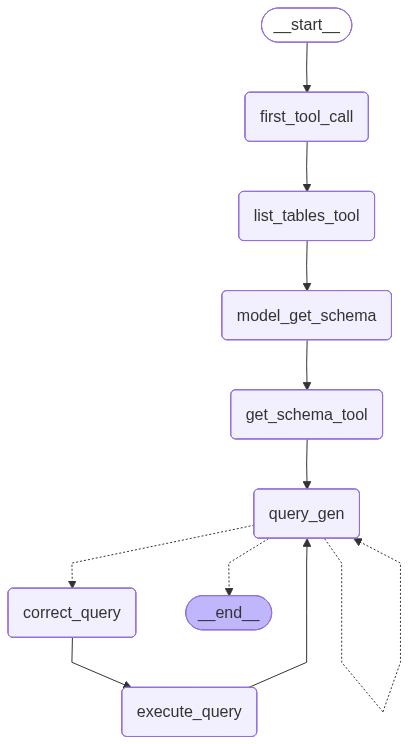

In [52]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [59]:
query={"messages": [("user", "Tell me name of the employee who's salary is less than 50000?")]}


In [60]:
response = app.invoke(query)

# Check if the response contains an error
if isinstance(response, dict) and "error" in response:
	print("Error:", response["error"]["message"])
else:
	print("Response:", response)


Response: {'messages': [HumanMessage(content="Tell me name of the employee who's salary is less than 50000?", additional_kwargs={}, response_metadata={}, id='bd1ee997-0600-457a-8426-e1214c5d5be4'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='2de82d71-c389-42e9-afa1-4a5eca623ca3', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}], invalid_tool_calls=[]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='64b216d8-925d-402d-bd0e-a66334759df6', tool_call_id='tool_abcd123'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'b9nz512n5', 'function': {'arguments': '{"table_names":"employees"}', 'name': 'sql_db_schema'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 376, 'total_tokens': 393, 'completion_time': 0.046559233, 'completion_tokens_details': None, 'prompt_time': 0.033002787, 'prompt_tokens_details': None, 'queue

In [61]:
# Extract the final answer
final_answer = response["messages"][-1].content
print("Final Answer:", final_answer)

Final Answer: The answer to your question is: The employee with a salary less than 50000 is Bob Brown.


In [62]:
query={"messages": [("user", "Tell me about all the orders")]}


In [63]:
response = app.invoke(query)


In [64]:
# Extract the final answer
final_answer = response["messages"][-1].content
print("Final Answer:", final_answer)

Final Answer: The orders table contains 4 rows. 
The orders are as follows:
- Order 1 was made by customer 1 on 2023-12-01 for the amount of 250.75.
- Order 2 was made by customer 2 on 2023-11-20 for the amount of 150.5.
- Order 3 was made by customer 3 on 2023-11-25 for the amount of 300.0.
- Order 4 was made by customer 4 on 2023-12-02 for the amount of 450.0.
